Importación de archivos

In [7]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster


In [8]:
current_dir = os.getcwd()
print(current_dir)
nombre_archivo="yelp_academic_dataset_business.json"
nombre_archivo_rw="yelp_academic_dataset_review.json"

/Users/clarakearney/Documents/UdeSA/MIA/AprendizajeAutomaticoII/tp_yelp


In [9]:
path = os.path.join(current_dir, "yelp_dataset", nombre_archivo)
print(f"Leyendo archivo desde: {path}")

businesses = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        businesses.append(json.loads(line))

Leyendo archivo desde: /Users/clarakearney/Documents/UdeSA/MIA/AprendizajeAutomaticoII/tp_yelp/yelp_dataset/yelp_academic_dataset_business.json


Análisis inicial

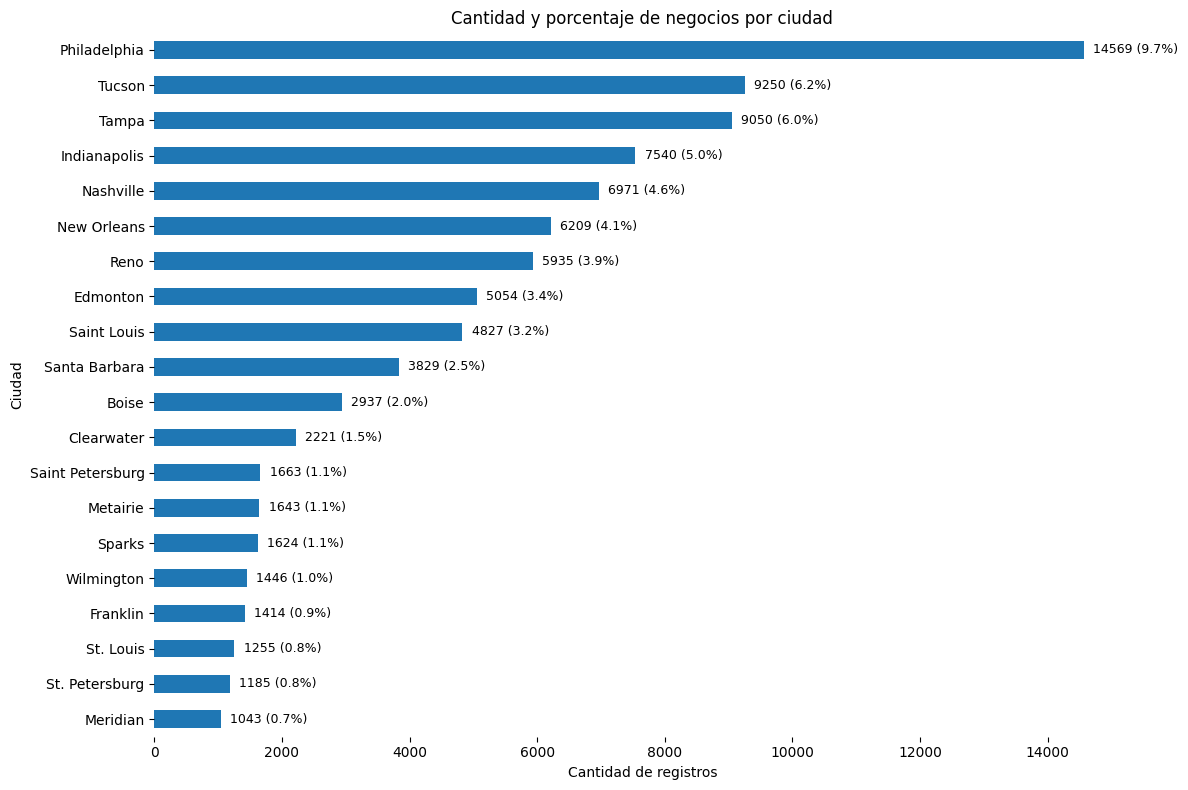

In [10]:
# Convertimos a DataFrame
df_business = pd.DataFrame(businesses)

# Contamos negocios por ciudad
city_counts = df_business["city"].value_counts()
total_businesses = city_counts.sum()

# Mostramos las 20 principales (por ejemplo)
top_cities = city_counts.head(20)
top_cities = top_cities.sort_values()
top_percentages = (top_cities / total_businesses) * 100

# Graficamos
plt.figure(figsize=(12, 8))
ax = top_cities.plot(kind="barh", color="#1f77b4")
plt.title("Cantidad y porcentaje de negocios por ciudad")
plt.xlabel("Cantidad de registros")
plt.ylabel("Ciudad")

# Etiquetamos cada barra con cantidad y porcentaje
label_offset = max(top_cities) * 0.01
for idx, value in enumerate(top_cities.values):
    pct = top_percentages.iloc[idx]
    ax.text(value + label_offset, idx, f"{value:.0f} ({pct:.1f}%)", va="center", fontsize=9)

# Quitamos el recuadro del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


In [11]:
# Mapa interactivo para explorar negocios
map_columns = ['name', 'city', 'state', 'postal_code', 'latitude', 'longitude']
map_df = df_business[map_columns].dropna()

# Limitamos la cantidad de puntos para mantener el mapa interactivo ligero
sample_size = 2000 if len(map_df) > 2000 else len(map_df)
map_sample = map_df.sample(sample_size, random_state=42)

center = [map_sample['latitude'].mean(), map_sample['longitude'].mean()]
biz_map = folium.Map(location=center, zoom_start=4, tiles='CartoDB positron')
cluster = MarkerCluster().add_to(biz_map)

for _, row in map_sample.iterrows():
    popup = (
        f"<b>{row['name']}</b><br>"
        f"{row['city']}, {row['state']} {row['postal_code']}"
    )
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        weight=0,
        fill=True,
        fill_color='#1f77b4',
        fill_opacity=0.6,
        popup=''.join(popup),
    ).add_to(cluster)

biz_map
